In [7]:
!pip install pillow

In [10]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import glob
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
!pip install PrettyTable
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [24]:
#loading data
list_img = []
mean_list = []
img_p = r'C:\Users\AU\far\h1\6\image\Images/*.jpg' 

# Given PIL Image, return average value of color as (r, g, b)
def avcolor(image):
  # get image as numpy array
    i = np.array(image)
  # get shape
    a, b, c = i.shape
  # change shape
    i.shape = (a*b, c)
  # get mean
    return np.mean(i, axis=0)

for j in glob.glob(img_p):
    img=Image.open(j)
    list_img.append(img)
    mean_list.append(avcolor(img))
    img.close()
    

mean_list = np.array(mean_list)


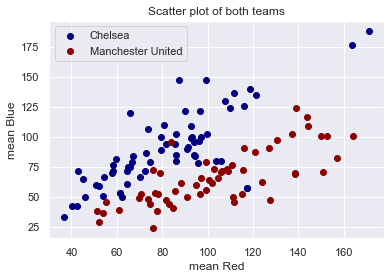

In [29]:
#number of each dataset
c=65
m=57
#plotting the graph
plt.scatter(mean_list[:c, 0], mean_list[:c, 2], color='navy', label='Chelsea')
plt.scatter(mean_list[c:, 0], mean_list[c:, 2], color='darkred', label='Manchester United')
plt.legend(loc="upper left")
plt.xlabel('mean Red')
plt.ylabel('mean Blue')
plt.title('Scatter plot of both teams')
plt.show()

In [38]:
# fitting the model

 
feat = mean_list
label = c * ['Chelsea'] + m * ['Manchester United']
train_fet, test_fet, train_labels, test_labels = train_test_split(feat, label, test_size=0.3)
gb = GaussianNB() 
gb.fit(train_fet, train_labels)

GaussianNB()

In [39]:
#result
res = gb.predict(test_fet)


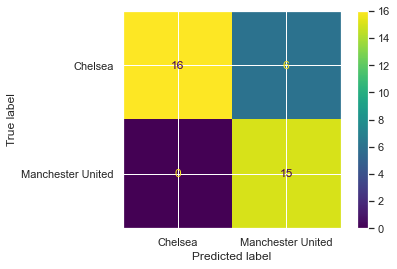

In [40]:
#confusion_matrix
cm = metrics.confusion_matrix(test_labels, res)
cm_d = metrics.ConfusionMatrixDisplay(cm,display_labels=['Chelsea','Manchester United'])
cm_d.plot()
plt.show()

In [41]:
precision, recall, fscore, support = score(test_labels,res)

chart = PrettyTable(['Label', 'Precision', 'Recall'])
chart.add_row(['Chelsea', round(precision[0]*100, 2), round(recall[0]*100, 2)])
chart.add_row(['Manchester United', round(precision[1]*100, 2), round(recall[1]*100, 2)])
print(chart)

+-------------------+-----------+--------+
|       Label       | Precision | Recall |
+-------------------+-----------+--------+
|      Chelsea      |   100.0   | 72.73  |
| Manchester United |   71.43   | 100.0  |
+-------------------+-----------+--------+


In [42]:
#accuracy
acc = accuracy_score(test_labels,res)
acc

0.8378378378378378